Load and Inspect the Dataset

In [5]:
import pandas as pd
# Load the CSV
df = pd.read_csv("../data/raw/data.csv")

# Display first few rows
df.head()

# Dataset shape
print("Shape:", df.shape)

# Data types and non-null counts
df.info()

Shape: (95662, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  

Summary Statistics

In [6]:
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


Numerical features distribution

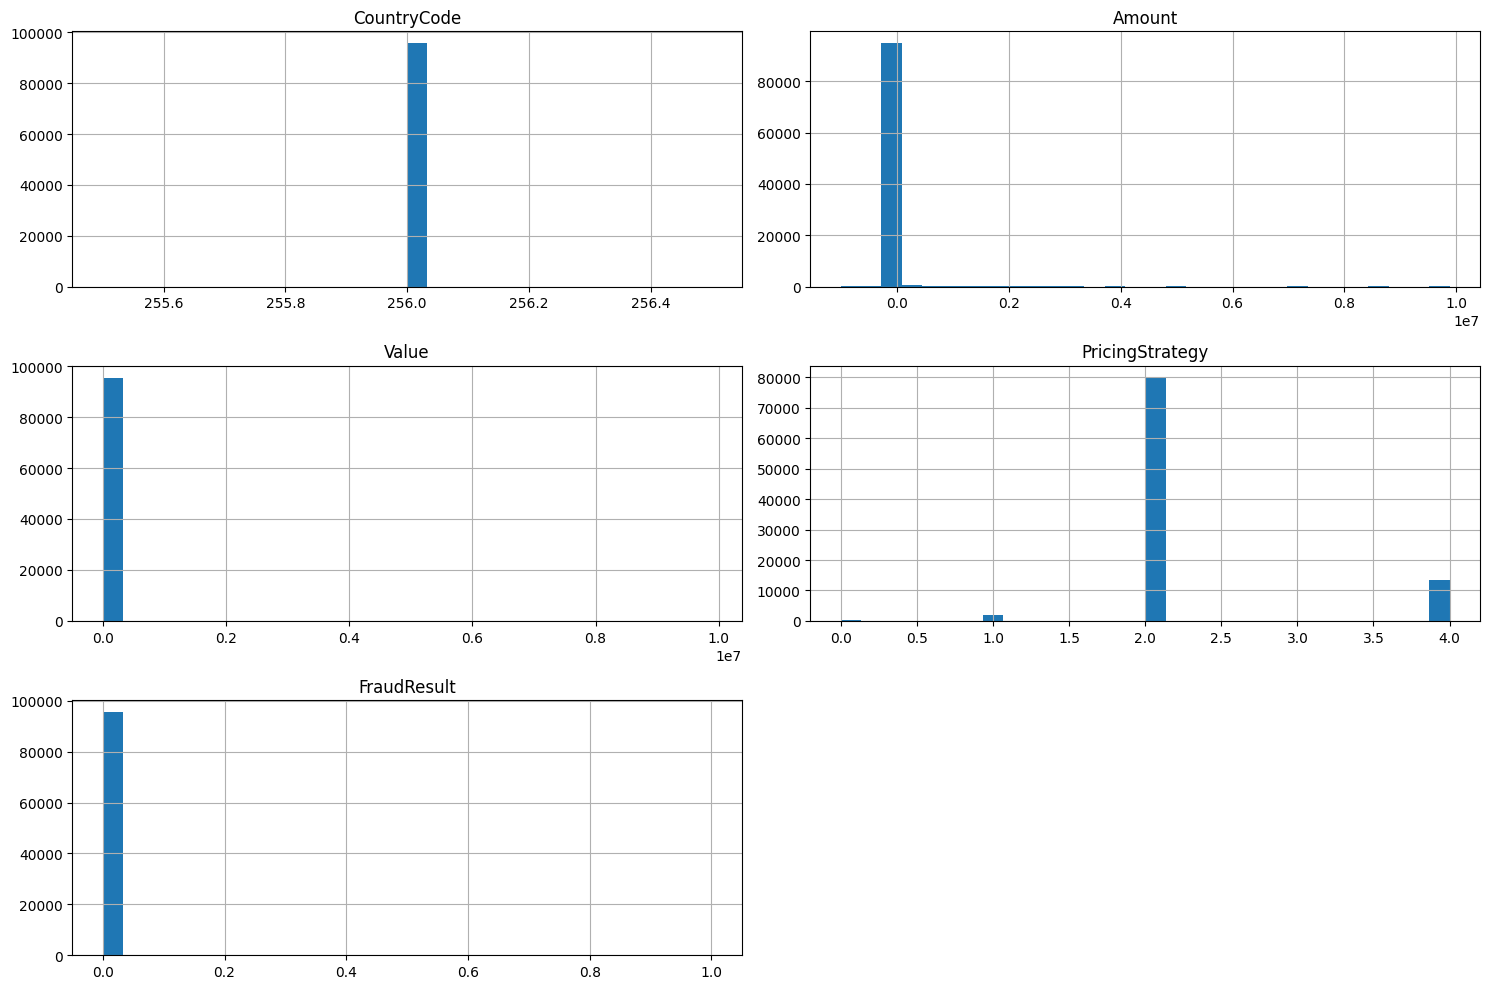

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include='number').columns

# Histogram for each numerical column
df[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

categorical features distribution


CurrencyCode value counts:
 CurrencyCode
UGX    95662
Name: count, dtype: int64


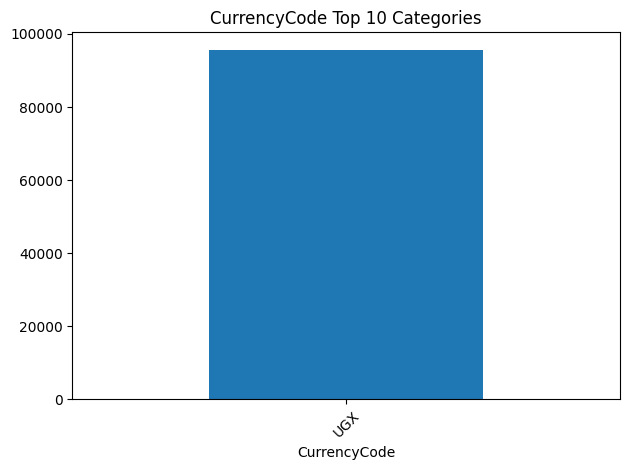


ProviderId value counts:
 ProviderId
ProviderId_4    38189
ProviderId_6    34186
ProviderId_5    14542
ProviderId_1     5643
ProviderId_3     3084
ProviderId_2       18
Name: count, dtype: int64


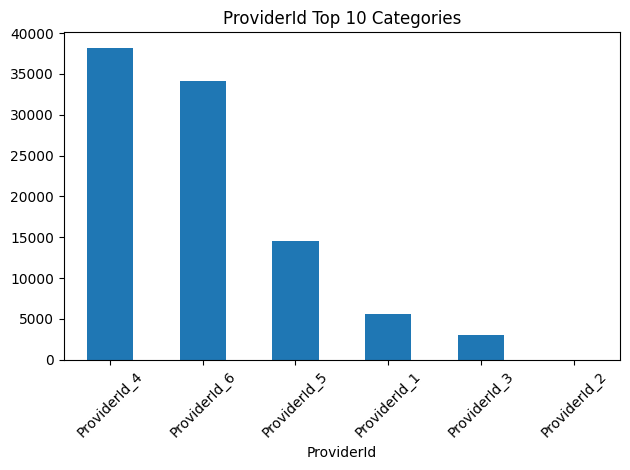


ProductCategory value counts:
 ProductCategory
financial_services    45405
airtime               45027
utility_bill           1920
data_bundles           1613
tv                     1279
ticket                  216
movies                  175
transport                25
other                     2
Name: count, dtype: int64


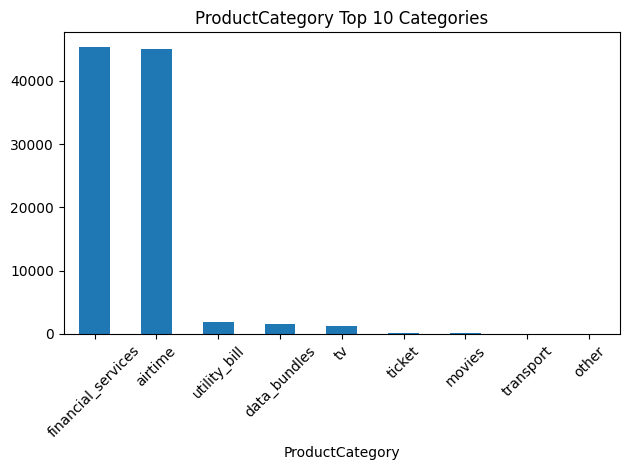


ChannelId value counts:
 ChannelId
ChannelId_3    56935
ChannelId_2    37141
ChannelId_5     1048
ChannelId_1      538
Name: count, dtype: int64


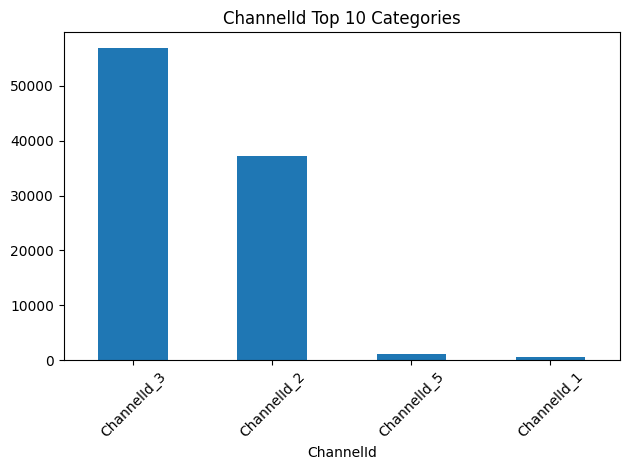


TransactionStartTime value counts:
 TransactionStartTime
2018-12-24T16:30:13Z    17
2018-11-15T07:03:26Z     9
2018-12-07T13:09:44Z     6
2018-12-24T16:30:12Z     6
2018-11-15T07:03:27Z     5
2018-12-07T13:09:47Z     4
2018-12-24T16:30:11Z     4
2018-12-07T11:54:01Z     4
2019-01-04T04:29:41Z     4
2019-01-14T17:24:54Z     4
Name: count, dtype: int64


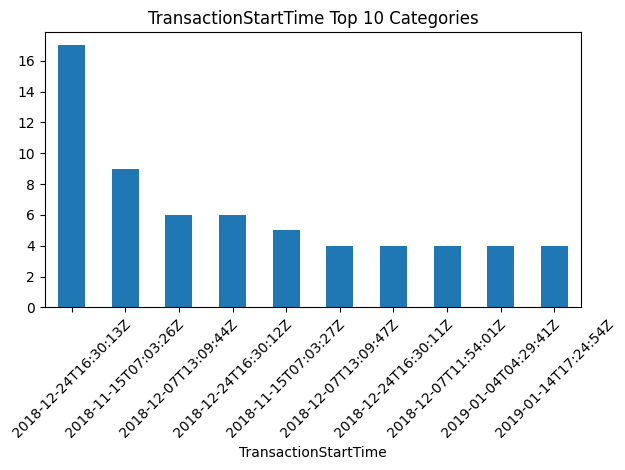

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Optional: Exclude high-cardinality ID-like columns
high_cardinality = ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'ProductId']
filtered_categorical_cols = [col for col in categorical_cols if col not in high_cardinality]

# Plot Top 10 value counts per column
for col in filtered_categorical_cols:
    print(f"\n{col} value counts:\n", df[col].value_counts().head(10))
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f"{col} Top 10 Categories")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Correlation Analysis

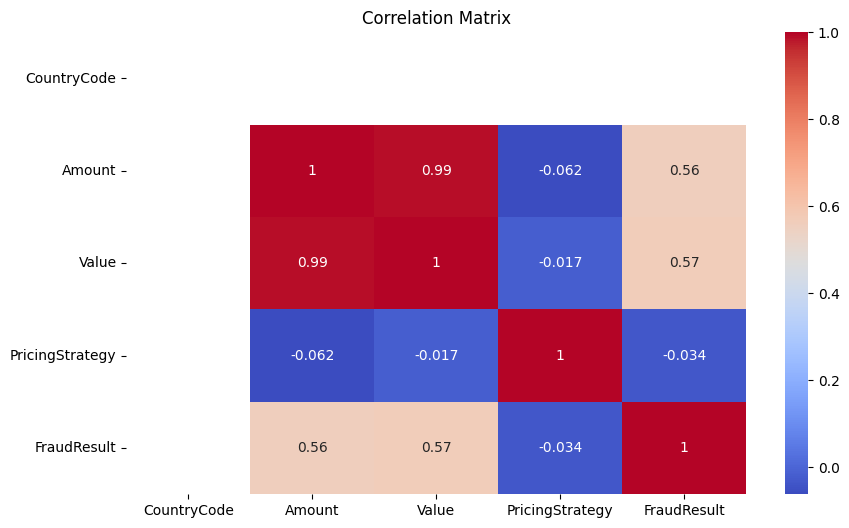

In [9]:
# Correlation matrix
corr = df[numerical_cols].corr()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


Identify Missing Values

Missing Values:
 Series([], dtype: int64)


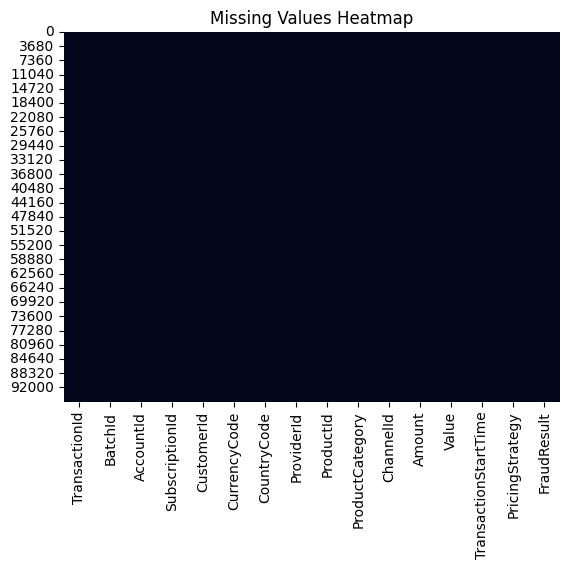

In [10]:
missing = df.isnull().sum()
missing = missing[missing > 0]
print("Missing Values:\n", missing)

# Visualize missing
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

Boxplots(outlier detection)

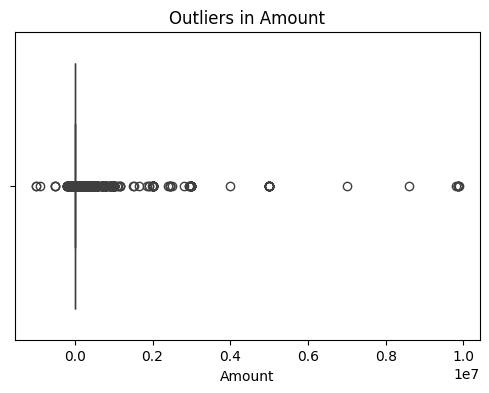

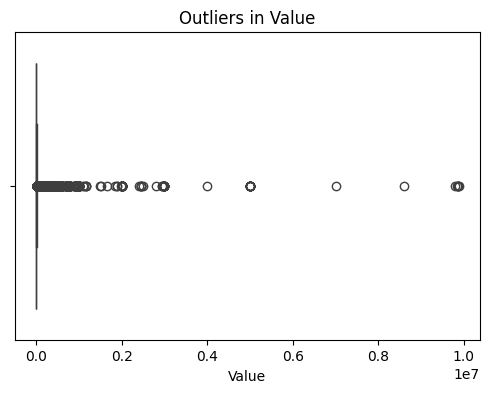

In [11]:
for col in ['Amount', 'Value']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f"Outliers in {col}")
    plt.show()

## Key EDA Insights

1. The `Amount` column is right-skewed, indicating many low transactions and few high ones.
2. `ProductCategory` has a dominant category, which may lead to class imbalance.
3. Missing values were found in `PricingStrategy` and `ProviderId`, requiring imputation.
4. The correlation between `Amount` and `Value` is almost perfect (redundancy?).
5. Few outliers exist in `Amount` — potential for scaling or capping.